# Rectangular Loop Magnetic Field Demo (Arbitrarily Oriented)

This demo showcases the refactored `rectangular_loop_field` function. It now defines a rectangle by three corner points, allowing for arbitrary orientation in 3D space. The demo visualizes the loop geometry and computes the magnetic field at an observation point.

In [1]:
import sys
sys.path.append('../..')
import numpy as np
from mtflib import *
from src.applications.em.rectangular_loop import rectangular_loop_field
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Define Geometry and Visualize

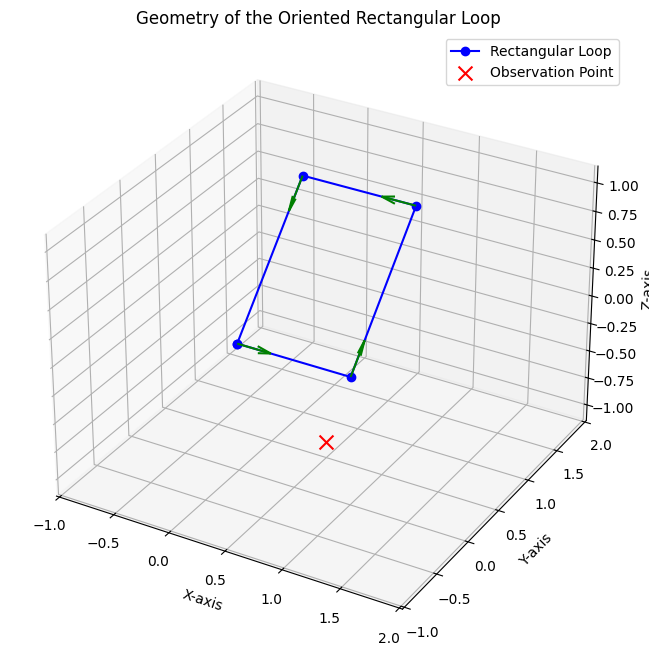

In [2]:
# --- Loop and Field Point Parameters ---
p1 = np.array([0, 0, 0])
p2 = np.array([1, 0, 0]) # Side 1 along x-axis
p4 = np.array([0, 1, 1]) # Side 2 in yz-plane, making the loop tilted
current = 1.0
observation_point = [0.5, 0.5, -1.0] # An off-axis observation point

# Calculate the 4th corner
p3 = p2 + (p4 - p1)
corners = [p1, p2, p3, p4]
loop_segments = np.array(corners + [corners[0]])

# --- Visualize the Setup ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(loop_segments[:,0], loop_segments[:,1], loop_segments[:,2], 'b-o', label='Rectangular Loop')
ax.scatter(observation_point[0], observation_point[1], observation_point[2], c='r', marker='x', s=100, label='Observation Point')

# Add arrows for current direction
for i in range(4):
    start = corners[i]
    end = corners[(i + 1) % 4]
    ax.quiver(start[0], start[1], start[2], 
              end[0]-start[0], end[1]-start[1], end[2]-start[2], 
              length=0.3, normalize=True, color='g', arrow_length_ratio=0.4)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Geometry of the Oriented Rectangular Loop')
ax.legend()
ax.axis('equal')
plt.show()

### 2. Numerical B-Field Calculation

In [3]:
# --- MTF Setup ---
MultivariateTaylorFunction.initialize_mtf(max_order=2, max_dimension=3)
x = Var(1); y = Var(2); z = Var(3)

# --- Define Field Point for Taylor Expansion ---
# We expand around the observation point
field_point_mtf = np.array([[x + observation_point[0], y + observation_point[1], z + observation_point[2]]], dtype=object)

# --- Calculate the B-field numerically ---
B_numerical = rectangular_loop_field(
    p1, p2, p4, current, field_point_mtf, num_segments_per_side=50)

B_numerical_vector = B_numerical[0] # Result has shape (1,3), so get the first row

print("Computed B-field at the observation point (constant term of the Taylor series):")
Bx = B_numerical_vector[0].extract_coefficient((0,0,0))
By = B_numerical_vector[1].extract_coefficient((0,0,0))
Bz = B_numerical_vector[2].extract_coefficient((0,0,0))
print(f"B = [{Bx[0]:.3e}, {By[0]:.3e}, {Bz[0]:.3e}] Tesla")

Initializing MTF globals with: _GLOBAL_MAX_ORDER=2, _GLOBAL_MAX_DIMENSION=3
Loading/Precomputing Taylor coefficients up to order 2
Global precomputed coefficients loading/generation complete.
Size of precomputed_coefficients dictionary in memory: 464 bytes, 0.45 KB, 0.00 MB
MTF globals initialized: _GLOBAL_MAX_ORDER=2, _GLOBAL_MAX_DIMENSION=3, _INITIALIZED=True
Max coefficient count (order=2, nvars=3): 10
Precomputed coefficients loaded and ready for use.


Computed B-field at the observation point (constant term of the Taylor series):
B = [0.000e+00, 1.513e-08, 6.622e-08] Tesla


### 3. Conclusion

This demo successfully calculates the magnetic field of an arbitrarily oriented rectangular loop by defining it with three corner points. The visualization confirms the geometry, and the function computes the field at the specified observation point. A direct analytical comparison is omitted due to its complexity for an arbitrarily oriented loop.